In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime
import time

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(
    style='ticks', 
    context='talk', 
    font_scale=0.8, 
    rc={'figure.figsize': (7,5)}
)

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier



# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [2]:
df_22_23season = pd.read_csv('22_23.csv')
df_21_22season = pd.read_csv('21_22.csv')
df_20_21season = pd.read_csv('20_21.csv')
df_19_20season = pd.read_csv('19_20.csv')
df_18_19season = pd.read_csv('18_19.csv')
df_17_18season = pd.read_csv('17_18.csv')
df_16_17season = pd.read_csv('16_17.csv')
df_15_16season = pd.read_csv('15_16.csv')
df_14_15season = pd.read_csv('14_15.csv')
df_13_14season = pd.read_csv('13_14.csv')

In [3]:
# Concatinate the 10 tables
all_season_df = pd.concat([df_22_23season, df_21_22season, df_20_21season, df_19_20season, 
                           df_18_19season, df_17_18season, df_16_17season, df_15_16season, df_14_15season, df_13_14season], ignore_index=True)

In [4]:
all_season_df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,LBH,LBD,LBA,SJH,SJD,SJA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0.0,2.0,A,0.0,1.0,A,A Taylor,10.0,10.0,2.0,2.0,16.0,11.0,3.0,5.0,1.0,2.0,0.0,0.0,4.20,3.6,1.85,4.33,3.50,1.87,4.30,3.55,1.85,4.50,3.65,1.89,4.40,3.5,1.83,4.60,3.5,1.87,4.60,3.78,1.95,4.39,3.59,1.88,2.10,1.72,2.14,1.78,2.19,1.91,2.09,1.76,0.50,2.04,1.89,2.03,1.89,2.06,1.91,2.01,1.87,4.50,3.60,1.80,4.50,3.5,1.83,4.40,3.55,1.85,4.58,3.63,1.88,4.80,3.4,1.78,4.75,3.5,1.85,5.01,3.70,1.91,4.56,3.57,1.85,2.10,1.72,2.14,1.78,2.19,1.91,2.08,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,06/08/2022,12:30,Fulham,Liverpool,2.0,2.0,D,1.0,0.0,H,A Madley,9.0,11.0,3.0,4.0,7.0,9.0,4.0,4.0,2.0,0.0,0.0,0.0,11.00,6.0,1.25,10.00,5.75,1.28,12.00,5.75,1.27,11.20,6.22,1.28,12.00,5.5,1.27,13.00,6.0,1.25,13.00,6.40,1.31,10.99,6.05,1.28,1.50,2.62,1.50,2.70,1.54,2.76,1.48,2.63,1.75,1.90,2.03,1.91,2.00,1.92,2.04,1.89,1.99,11.00,5.75,1.28,9.25,6.0,1.29,11.00,5.50,1.30,10.50,6.50,1.29,11.00,5.5,1.27,11.50,6.0,1.29,11.95,6.93,1.30,10.33,6.20,1.28,1.50,2.62,1.49,2.77,1.51,3.00,1.47,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2.0,0.0,H,1.0,0.0,H,P Bankes,7.0,15.0,3.0,2.0,18.0,16.0,5.0,5.0,3.0,3.0,0.0,0.0,3.75,3.5,2.00,3.75,3.40,2.00,3.65,3.45,2.05,3.93,3.58,2.04,3.75,3.3,2.05,3.75,3.3,2.00,4.00,3.66,2.10,3.80,3.50,2.04,2.00,1.80,2.10,1.81,2.10,1.87,2.03,1.80,0.50,1.87,2.06,1.88,2.04,1.88,2.07,1.85,2.04,4.00,3.50,1.95,3.90,3.4,1.95,3.85,3.45,2.00,4.09,3.59,2.00,4.00,3.4,1.95,4.10,3.4,2.00,4.25,3.63,2.06,3.99,3.49,2.00,2.10,1.72,2.13,1.79,2.24,1.81,2.10,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,06/08/2022,15:00,Leeds,Wolves,2.0,1.0,H,1.0,1.0,D,R Jones,12.0,15.0,4.0,6.0,13.0,9.0,6.0,4.0,2.0,0.0,0.0,0.0,2.25,3.4,3.20,2.30,3.30,2.95,2.30,3.30,3.15,2.39,3.33,3.30,2.25,3.3,3.20,2.30,3.2,3.10,2.42,3.54,3.30,2.34,3.34,3.18,2.05,1.85,2.09,1.83,2.11,1.87,2.03,1.81,-0.25,2.05,1.88,2.04,1.89,2.06,1.90,2.01,1.87,2.37,3.30,3.00,2.40,3.3,2.75,2.45,3.30,2.95,2.45,3.44,3.09,2.40,3.3,2.90,2.40,3.4,3.00,2.50,3.55,3.18,2.43,3.36,3.02,1.95,1.95,1.96,1.94,2.09,1.96,1.96,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2.0,0.0,H,0.0,0.0,D,S Hooper,23.0,5.0,10.0,0.0,9.0,14.0,11.0,1.0,0.0,3.0,0.0,0.0,1.66,3.8,5.25,1.65,3.80,5.50,1.65,3.80,5.50,1.71,3.74,5.83,1.67,3.7,5.25,1.62,3.7,5.50,1.72,3.96,6.00,1.67,3.80,5.57,2.05,1.85,2.10,1.81,2.10,1.86,2.03,1.81,-0.75,1.87,2.06,1.92,2.01,1.92,2.08,1.86,2.02,1.53,4.00,6.00,1.58,3.9,6.00,1.63,3.80,6.00,1.57,4.22,6.60,1.53,3.9,6.50,1.57,3.9,7.00,1.67,4.30,7.00,1.59,4.07,6.15,1.94,1.96,1.97,1.93,2.06,1.97,1.94,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_season_df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'LBH', 'LBD', 'LBA', 'SJH',
       'SJD', 'SJA'],
      dtype='object', length=130)

In [6]:
all_season_df.shape

(3801, 130)

We have 130 coulmns, though the columns are in 5 sections according to our table, These are:  

 **Key to results data**     
 **Match Statistics (where available)**  
 **betting odds data**  
 **Key to total goals betting odds**  
 **Asian handicap betting odds**  
 
 Each of this sections has their number of columns, For this project I will use the first 3 sections. First task is to see take columns from the first 2 sections and see which of the columns are important for our model, There are several ways to do that, I will only be using 3 of those methods which are:
 
 **Domain Experts and Stakeholders**.   
 **Correlation Analysis**.   
 **SelectKBest**.   

In [7]:
#comining columns from Key to result data and Match Statistics
columns_to_keep = ['HomeTeam', 'AwayTeam',"FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"
]

# Drop all other columns except the specified ones
test_column_df = all_season_df[columns_to_keep]

In [8]:
test_column_df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Crystal Palace,Arsenal,0.0,2.0,A,0.0,1.0,A,10.0,10.0,2.0,2.0,16.0,11.0,3.0,5.0,1.0,2.0,0.0,0.0
1,Fulham,Liverpool,2.0,2.0,D,1.0,0.0,H,9.0,11.0,3.0,4.0,7.0,9.0,4.0,4.0,2.0,0.0,0.0,0.0
2,Bournemouth,Aston Villa,2.0,0.0,H,1.0,0.0,H,7.0,15.0,3.0,2.0,18.0,16.0,5.0,5.0,3.0,3.0,0.0,0.0
3,Leeds,Wolves,2.0,1.0,H,1.0,1.0,D,12.0,15.0,4.0,6.0,13.0,9.0,6.0,4.0,2.0,0.0,0.0,0.0
4,Newcastle,Nott'm Forest,2.0,0.0,H,0.0,0.0,D,23.0,5.0,10.0,0.0,9.0,14.0,11.0,1.0,0.0,3.0,0.0,0.0


In [9]:
test_column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  3800 non-null   object 
 1   AwayTeam  3800 non-null   object 
 2   FTHG      3800 non-null   float64
 3   FTAG      3800 non-null   float64
 4   FTR       3800 non-null   object 
 5   HTHG      3800 non-null   float64
 6   HTAG      3800 non-null   float64
 7   HTR       3800 non-null   object 
 8   HS        3800 non-null   float64
 9   AS        3800 non-null   float64
 10  HST       3800 non-null   float64
 11  AST       3800 non-null   float64
 12  HF        3800 non-null   float64
 13  AF        3800 non-null   float64
 14  HC        3800 non-null   float64
 15  AC        3800 non-null   float64
 16  HY        3800 non-null   float64
 17  AY        3800 non-null   float64
 18  HR        3800 non-null   float64
 19  AR        3800 non-null   float64
dtypes: float64(16), object(4)
memo

In [10]:
def categorize_victory(row):
    if row['FTR'] == 'A':
        return 0
    elif row['FTR'] == 'D':
        return 1
    else:
        return 2

In [11]:
test_column_df["FinalResult"] = test_column_df.apply(lambda row: categorize_victory(row),axis=1)
#Drop both HTR AND FTR as we have encoded the target
test_column_df.drop(['FTR', 'HTR'],axis = 1, inplace = True)
test_column_df.tail() 

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FinalResult
3796,Norwich,Arsenal,0.0,2.0,0.0,0.0,11.0,14.0,5.0,8.0,6.0,5.0,4.0,4.0,1.0,0.0,0.0,0.0,0
3797,Southampton,Man United,1.0,1.0,1.0,0.0,15.0,8.0,6.0,2.0,16.0,5.0,6.0,2.0,3.0,2.0,0.0,0.0,1
3798,Sunderland,Swansea,1.0,3.0,0.0,2.0,20.0,8.0,4.0,4.0,14.0,15.0,6.0,3.0,2.0,3.0,0.0,0.0,0
3799,Tottenham,Aston Villa,3.0,0.0,3.0,0.0,12.0,4.0,6.0,1.0,11.0,11.0,5.0,1.0,1.0,0.0,0.0,0.0,2
3800,West Brom,Stoke,1.0,2.0,0.0,1.0,17.0,15.0,4.0,4.0,4.0,7.0,11.0,6.0,0.0,0.0,0.0,0.0,0


In [12]:
test_column_df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FinalResult
0,Crystal Palace,Arsenal,0.0,2.0,0.0,1.0,10.0,10.0,2.0,2.0,16.0,11.0,3.0,5.0,1.0,2.0,0.0,0.0,0
1,Fulham,Liverpool,2.0,2.0,1.0,0.0,9.0,11.0,3.0,4.0,7.0,9.0,4.0,4.0,2.0,0.0,0.0,0.0,1
2,Bournemouth,Aston Villa,2.0,0.0,1.0,0.0,7.0,15.0,3.0,2.0,18.0,16.0,5.0,5.0,3.0,3.0,0.0,0.0,2
3,Leeds,Wolves,2.0,1.0,1.0,1.0,12.0,15.0,4.0,6.0,13.0,9.0,6.0,4.0,2.0,0.0,0.0,0.0,2
4,Newcastle,Nott'm Forest,2.0,0.0,0.0,0.0,23.0,5.0,10.0,0.0,9.0,14.0,11.0,1.0,0.0,3.0,0.0,0.0,2


In [13]:
test_column_df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS',
       'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'FinalResult'],
      dtype='object')

In [14]:
test_column_df.isna().sum()

HomeTeam       1
AwayTeam       1
FTHG           1
FTAG           1
HTHG           1
HTAG           1
HS             1
AS             1
HST            1
AST            1
HF             1
AF             1
HC             1
AC             1
HY             1
AY             1
HR             1
AR             1
FinalResult    0
dtype: int64

In [15]:
test_column_df.dropna(inplace = True)

ENCODING HomeTeam AND AwayTeam USING THE TARGET, TARGET ENCODING

In [16]:
 #Step1 Calculate class probabilities for each team
total_matches = test_column_df['HomeTeam'].value_counts() + test_column_df['AwayTeam'].value_counts()

 # Calculate the number of wins, draws, and losses for each team
wins = test_column_df[test_column_df['FinalResult'] == 2]['HomeTeam'].value_counts() + test_column_df[test_column_df['FinalResult'] == 0]['AwayTeam'].value_counts()
draws = test_column_df[test_column_df['FinalResult'] == 1]['HomeTeam'].value_counts() + test_column_df[test_column_df['FinalResult'] == 1]['AwayTeam'].value_counts()
losses = test_column_df[test_column_df['FinalResult'] == 0]['HomeTeam'].value_counts() + test_column_df[test_column_df['FinalResult'] == 2]['AwayTeam'].value_counts()

# Calculate class probabilities for each team
P_win = wins / total_matches
P_draw = draws / total_matches
P_loss = losses / total_matches

# Step 2: Replace team names with [P(win), P(draw), P(loss)]
test_column_df['HomeTeam'] = test_column_df['HomeTeam'].map(P_win).fillna(0).astype(float)
test_column_df['AwayTeam'] = test_column_df['AwayTeam'].map(P_win).fillna(0).astype(float)

In [17]:
test_column_df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FinalResult
0,0.313158,0.550000,0.0,2.0,0.0,1.0,10.0,10.0,2.0,2.0,16.0,11.0,3.0,5.0,1.0,2.0,0.0,0.0,0
1,0.236842,0.610526,2.0,2.0,1.0,0.0,9.0,11.0,3.0,4.0,7.0,9.0,4.0,4.0,2.0,0.0,0.0,0.0,1
2,0.293860,0.296992,2.0,0.0,1.0,0.0,7.0,15.0,3.0,2.0,18.0,16.0,5.0,5.0,3.0,3.0,0.0,0.0,2
3,0.298246,0.363158,2.0,1.0,1.0,1.0,12.0,15.0,4.0,6.0,13.0,9.0,6.0,4.0,2.0,0.0,0.0,0.0,2
4,0.330409,0.236842,2.0,0.0,0.0,0.0,23.0,5.0,10.0,0.0,9.0,14.0,11.0,1.0,0.0,3.0,0.0,0.0,2


<Axes: >

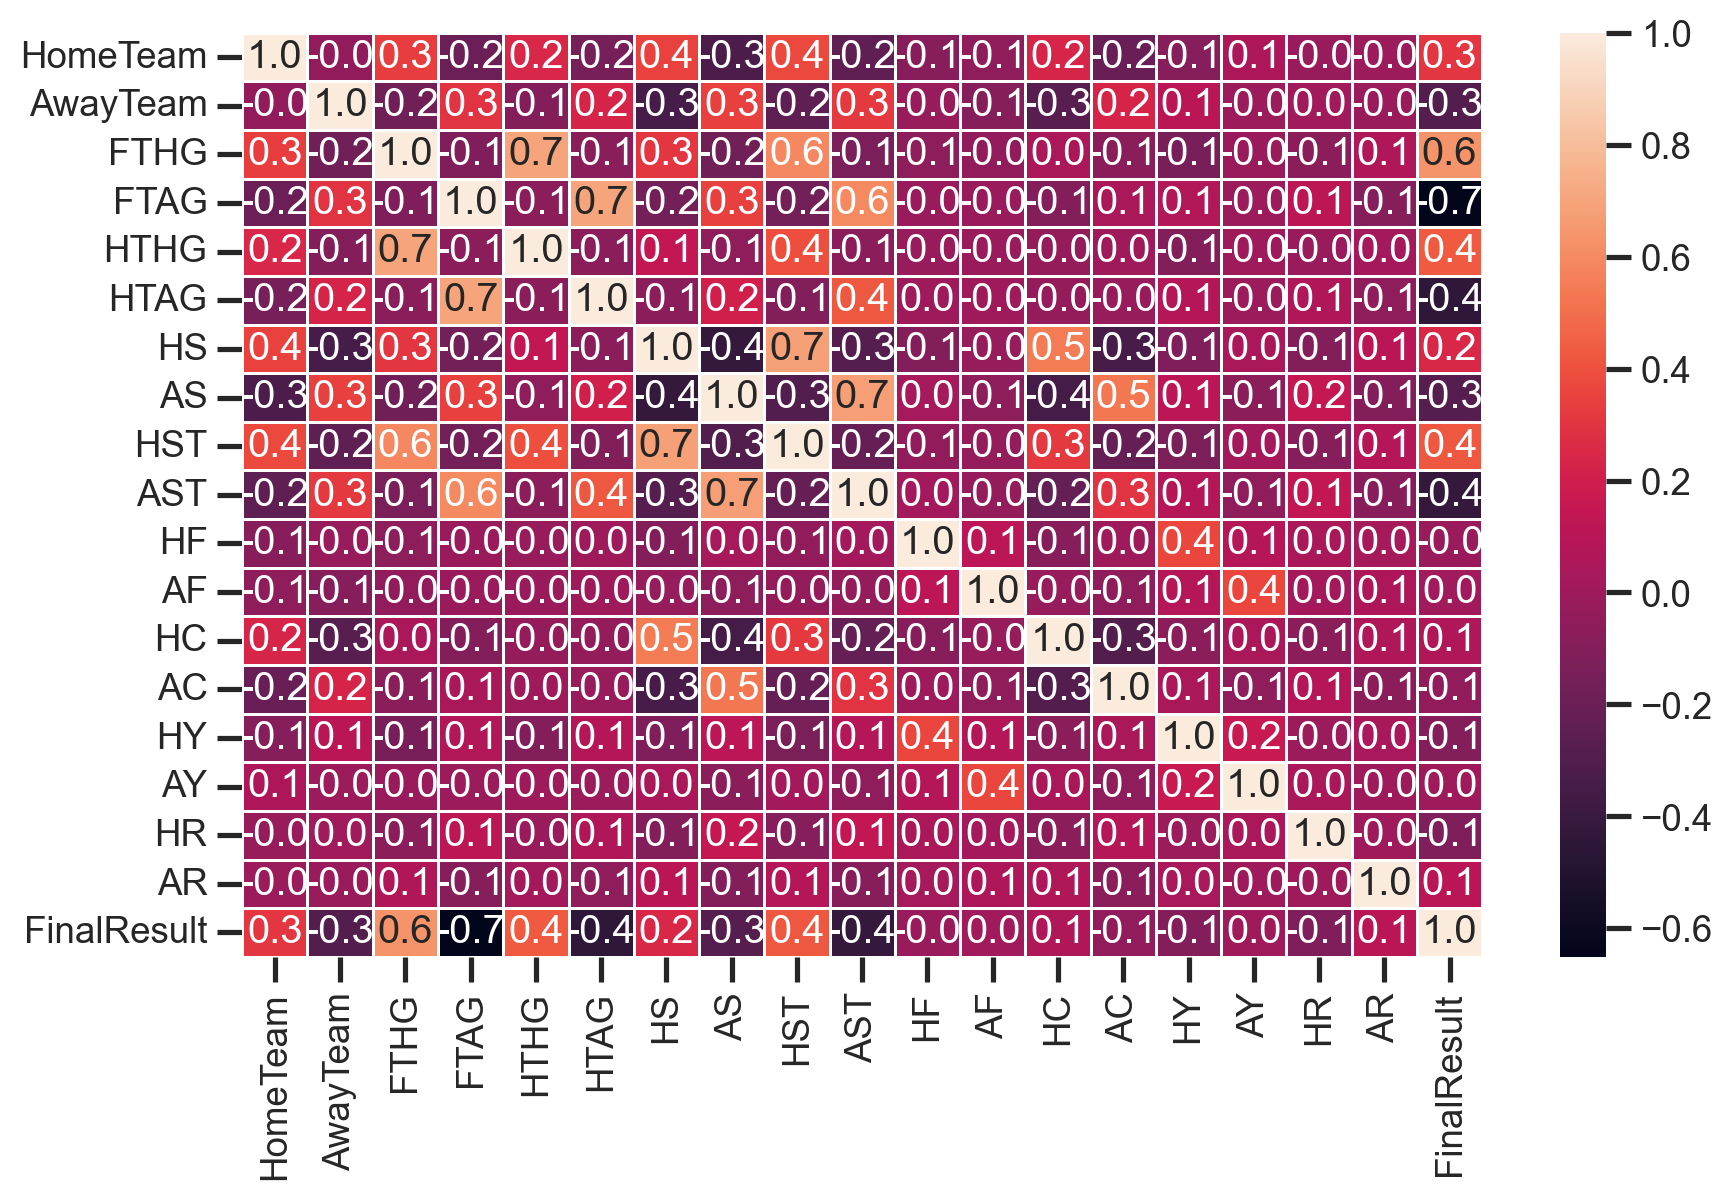

In [18]:
#correlation map
f,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(test_column_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

From the domain knowledge having to reveal the final score of matches already tells the final result of the match, I believe using FTHG and FTAG will make the model overfit, We further confirm this from the corellation graph above, FTHG AND FTAG having a very high correlation to FinalResult.

This observation can cause few things which are:  

- Data Leakage: I observed that there is leakage in the dataset, meaning that the features 'FTHG' and 'FTAG' are indirectly revealing information about the target variable. This can lead to overfitting, as the model learns to rely heavily on these features during training, so I had to drop them.

- Multicollinearity: 'FTHG' (Full Time Home Team Goals) and 'FTAG' (Full Time Away Team Goals) are also highly correlated with HTHG and HTAG. Multicollinearity can cause instability in the model and lead to overfitting, So I will pick HTHG AND HTAG for my model

SCALING THE COLUMNS

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selected_columns' contains the columns to scale
selected_columns = ['HomeTeam', 'AwayTeam', 'HTHG', 'HTAG',  'HS',
       'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns using Standard scaling
test_column_df[selected_columns] = scaler.fit_transform(test_column_df[selected_columns])

# Now the selected columns are scaled and have values between 0 and 1


In [20]:
#split into training/test sets
X = test_column_df.drop(columns=['FinalResult'])
y = test_column_df['FinalResult']
X.shape,y.shape

((3800, 18), (3800,))

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [22]:
from sklearn.neural_network import MLPClassifier

# Define the models
rf = RandomForestClassifier(random_state=45)
lgr = LogisticRegression(random_state=45)



# Define a function to evaluate and store the results
def evaluate_model(model, X_train, y_train, X_test, y_test, models_df):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Store the results in the models dataframe
    new_row = {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }
    models_df = models_df.append(new_row, ignore_index=True)
    return models_df

# Create an empty dataframe to store the results
models_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Evaluate the first model (Random Forest Classifier)
models_df = evaluate_model(rf, X_train, y_train, X_test, y_test, models_df)

# Evaluate the second model (Logistic Regression)
models_df = evaluate_model(lgr, X_train, y_train, X_test, y_test, models_df)


# Display the results
print(models_df)


                    Model  Accuracy  Precision    Recall  F1-score
0  RandomForestClassifier  0.994737   0.994752  0.994737  0.994738
1      LogisticRegression  1.000000   1.000000  1.000000  1.000000


### SELECTKBEST

In [23]:
#split into training/test sets
X = test_column_df.drop(columns=['FinalResult','FTHG', 'FTAG'])
y = test_column_df['FinalResult']
X.shape,y.shape

((3800, 16), (3800,))

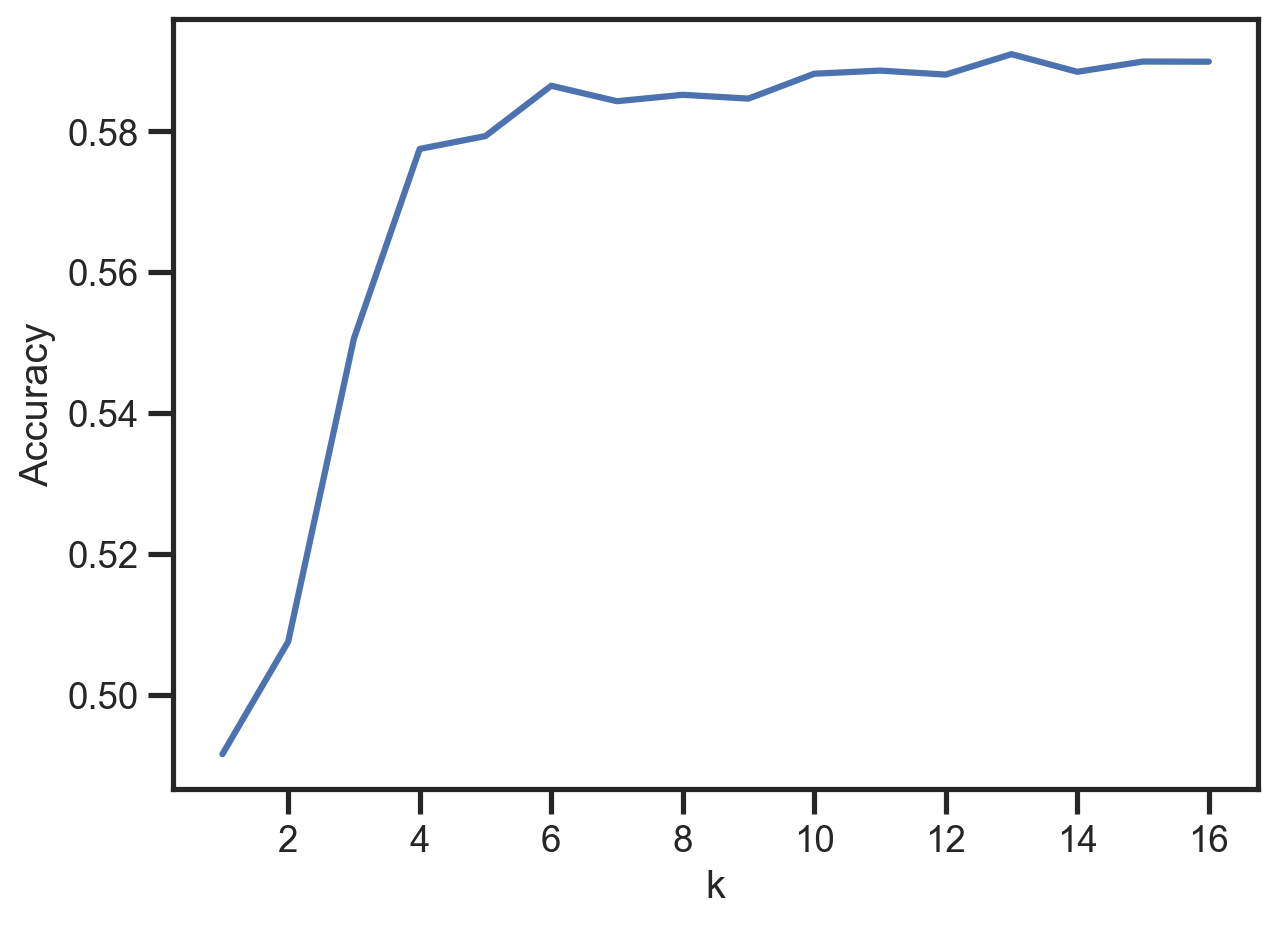

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_values = range(1, X.shape[1] + 1)
cv_scores = []
for k in k_values:
    selector = SelectKBest(chi2, k=k)
    X_selected = selector.fit_transform(X, y)
    
    # Step 5: Train and evaluate a logistic regression model using cross-validation
    clf = LogisticRegression(multi_class='ovr', max_iter=1000)
    scores = cross_val_score(clf, X_selected, y, cv=10, scoring='balanced_accuracy')
    cv_scores.append(np.mean(scores))

# Plot the accuracy as a function of k
import matplotlib.pyplot as plt
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [25]:
from sklearn.pipeline import make_pipeline

selector = make_pipeline(
    SelectKBest(chi2, k=13).fit(X, y)
).set_output(transform='pandas')

In [26]:
selector.get_feature_names_out()

array(['HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
       'HC', 'HY', 'AY', 'HR', 'AR'], dtype=object)

In [27]:
column_to_use = test_column_df[['HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
       'HC', 'HY', 'AY', 'HR', 'AR']]

In [28]:
X = column_to_use

In [29]:
X

,HomeTeam,AwayTeam,HTHG,HTAG,HS,AS,HST,AST,HC,HY,AY,HR,AR
0,0.317972,0.732719,0.0,0.2,0.232558,0.322581,0.117647,0.133333,0.157895,0.142857,0.222222,0.0,0.0
1,0.184332,0.838710,0.2,0.0,0.209302,0.354839,0.176471,0.266667,0.210526,0.285714,0.000000,0.0,0.0
2,0.284178,0.289664,0.2,0.0,0.162791,0.483871,0.176471,0.133333,0.263158,0.428571,0.333333,0.0,0.0
3,0.291859,0.405530,0.2,0.2,0.279070,0.483871,0.235294,0.400000,0.315789,0.285714,0.000000,0.0,0.0
4,0.348182,0.184332,0.0,0.0,0.534884,0.161290,0.588235,0.000000,0.578947,0.000000,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,0.080645,0.732719,0.0,0.0,0.255814,0.451613,0.294118,0.533333,0.210526,0.142857,0.000000,0.0,0.0
3797,0.327189,0.682028,0.2,0.0,0.348837,0.258065,0.352941,0.133333,0.315789,0.428571,0.222222,0.0,0.0
3798,0.138249,0.313364,0.0,0.4,0.465116,0.258065,0.235294,0.266667,0.315789,0.285714,0.333333,0.0,0.0
3799,0.714286,0.289664,0.6,0.0,0.279070,0.129032,0.352941,0.066667,0.263158,0.142857,0.000000,0.0,0.0


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3040, 13), (760, 13), (3040,), (760,))

In [31]:

# Define the models
rf = RandomForestClassifier(random_state=45)
lgr = LogisticRegression(random_state=45)


# Define a function to evaluate and store the results
def evaluate_model(model, X_train, y_train, X_test, y_test, models_df):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Store the results in the models dataframe
    new_row = {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }
    models_df = models_df.append(new_row, ignore_index=True)
    return models_df

# Create an empty dataframe to store the results
models_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Evaluate the first model (Random Forest Classifier)
models_df = evaluate_model(rf, X_train, y_train, X_test, y_test, models_df)

# Evaluate the second model (Logistic Regression)
models_df = evaluate_model(lgr, X_train, y_train, X_test, y_test, models_df)



# Display the results
print(models_df)


                    Model  Accuracy  Precision    Recall  F1-score
0  RandomForestClassifier  0.655263   0.628455  0.655263  0.635834
1      LogisticRegression  0.669737   0.628818  0.669737  0.630739
